## Vectorisation Approach

In [3]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# boston=load_boston();
# X=boston.data;
# y=boston.target;
# df=pd.DataFrame(X);
# df.head()
df=pd.read_csv("./Train/Train.csv");
df.shape;
df.head()

data=df.values;
X=data[:,0:5];
y=data[:,5];
# print(X[:5,:])
# print(y[:5])

In [5]:
#normalisation
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-u)/std;
df=pd.DataFrame(X);
df.head()
# add 1 to fist coloumn
m=X.shape[0]
ones=np.ones((m,1));
X=np.hstack((ones,X));
df=pd.DataFrame(X);
print(X.shape)
df.head()

(1600, 6)


,0,1,2,3,4,5
0,1.0,0.290165,-0.898712,-0.372381,0.441771,0.525024
1,1.0,-0.842705,-0.158229,-0.723656,-0.994642,0.598960
2,1.0,0.233004,0.157070,-0.102094,0.729947,-0.203782
3,1.0,0.171708,0.167210,-0.530576,-0.078377,-1.333037
4,1.0,-1.702188,0.558336,-2.723087,-0.633625,1.259339


In [6]:
def hypothesis(X,theta):
    return np.dot(X,theta);

def error(X,y,theta):
    m=X.shape[0]
    yhat=hypothesis(X,theta);
    
    return np.sum((yhat-y)**2)/m;

def Gradient(X,y,theta):
    yhat=hypothesis(X,theta);
    grad=np.dot(X.T,(yhat-y));
    m=X.shape[0]
    return grad/m;

def Gradient_Descent(X,y,alpha=0.05,iteration=300):
    error_list=[];
    m,n=X.shape;
    theta=np.zeros((n,));
    
    for i in range(iteration):
        e=error(X,y,theta);
        error_list.append(e);
        gd=Gradient(X,y,theta)
        stepsize=alpha*gd;
        theta=theta-stepsize;
    return theta,error_list;



[ 0.31883532 29.59357943 94.6506488   8.3754163  45.52301824  2.4645999 ]


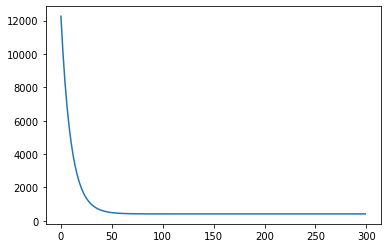

In [7]:
best_theta,error_list=Gradient_Descent(X,y);
print(best_theta);
plt.plot(error_list);

In [8]:
def r2_score(y,yhat):
    num=np.sum((y-yhat)**2);
    denom=np.sum((y-y.mean())**2)
    score=(1-num/denom)
    return score*100;

In [9]:
print(X.shape);
print(best_theta.shape);
yhat=hypothesis(X,best_theta);             
print(r2_score(y,yhat));

(1600, 6)
(6,)
96.6093966997385


In [10]:
# now test for test data
df=pd.read_csv("./Test/Test.csv");
df.shape;
df.head()
X_test=df.values;
u=np.mean(X_test,axis=0)
std=np.std(X_test,axis=0)
X_test=(X_test-u)/std;
m=X_test.shape[0];
ones=np.ones((m,1));
X_test=np.hstack((ones,X_test));
yhat=hypothesis(X_test,best_theta);

In [11]:
df=pd.DataFrame(data=yhat,columns=["target"])
df.head()

,target
0,115.771023
1,115.929858
2,-22.049907
3,-46.461744
4,-97.386669


In [12]:
# df.to_csv?
df.to_csv('y_predictionLR2.csv');